# **Author :**
# **Kartik Dalal**

- 🔗 LinkedIn - https://www.linkedin.com/in/kartik-dalal-642a42320/

- 📺 Medium  -  https://medium.com/@dalalkartik077

-    Github -  https://github.com/kartikdalal19

---

# **Project Name**    -  NYC Taxi Time Prediction (Regression)





NYC Taxi Time Prediction (Regression)

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - KARTIK DALAL**

# **Project Summary -**
This project predicts taxi trip durations in New York City using machine learning techniques. The dataset holds over 1.4 million records, which include key details like pickup and drop-off times, passenger counts, geographic coordinates, vendor IDs, and a flag showing if trip data was stored before being sent. The goal was to create a model that accurately estimates trip duration based on these features.

To prepare the data, preprocessing steps were taken. This included handling outliers, encoding categorical variables with One-Hot Encoding, and creating new features such as pickup hour, day of the week, and whether the trip took place on a weekend. We calculated trip distance using the Haversine formula based on the location coordinates.

Several machine learning models were trained and evaluated. These included Linear Regression, Ridge, Lasso, Polynomial Regression, K-Nearest Neighbors (KNN), Decision Trees, Random Forest, Gradient Boosting. We assessed these models using metrics like MAE, MSE, RMSE, and R² score. Hyperparameter tuning was performed using GridSearchCV to improve models such as KNN and Polynomial Regression. We applied RobustScaler for feature scaling to reduce the impact of outliers, which was particularly important due to the skewed nature of trip durations.

Overall, this project shows how proper data preparation, feature engineering, and model tuning can provide valuable insights and improve predictions in real-world transportation systems.

Write the summary here within 500-600 words.

# **GitHub Link -**

# **Problem Statement**


In a fast-paced urban environment like New York City, predicting how long a taxi ride will take is crucial for both customers and service providers. Many real-world factors such as pickup time, day of the week, location, and passenger load can significantly affect the duration of a trip. Relying on static average times is often inaccurate and inefficient.

This project addresses the question:

"Can we accurately predict the duration of a taxi trip using historical trip data and machine learning models based on available features such as time, location, and vendor?"

Solving this problem can enhance time estimation tools, help optimize fleet utilization, and contribute to smoother operations in urban transport systems.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
# from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

### Dataset Loading

In [ ]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_SETS/Copy of NYC Taxi Data.csv', encoding = 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

df.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


<Axes: >

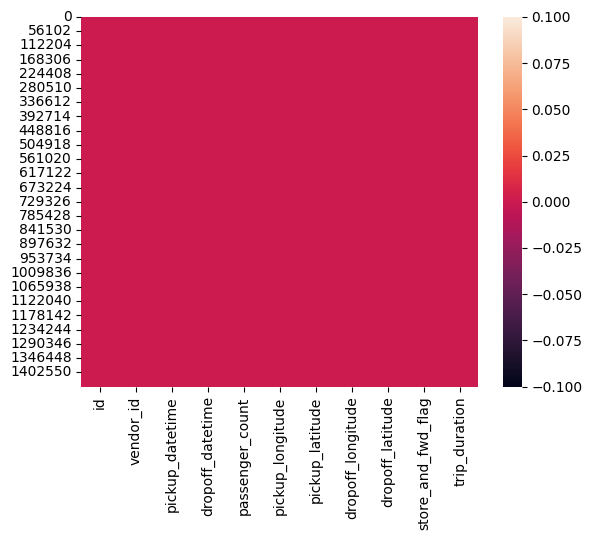

In [ ]:
# # Visualizing the missing values

sns.heatmap(df.isnull())

### What did you know about your dataset?




- This data-set has **13 columns and 1458644 rows**
- Has **no null values.**
- Has **no missing values.**
- has **no duplicate values**.
- This data-set mainly contains the** location and date-time** for each pick-up and drop of the passengers


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

**id**                     -  Contains unique id for each trip

**vendor_id**              -  Contains the unique id of the vendor

**pickup_datetime**        -  Contains the pick-up date and time

**dropoff_datetime**       -  Contains the drop-off date and time

**passenger_count**        -  Contains the number of the passengers

**pickup_longitude**       -  Contains the pick-up longitude(location)

**pickup_latitude**        -  Contains the pick-up latitude(location)

**dropoff_longitude**      -  Contains the drop-off longitude(location)

**dropoff_latitude**       -   Contains the drop-off latitude(location)

**store_and_fwd_flag**     -   Indicates whether the trip record was stored in the taxi’s memory before being forwarded to the server at a later time.

**trip_duration**          -  Contains the total duration of the trip


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
for i in df.columns.tolist():
  print(f"No. of unique values of{i} is {df[i].nunique()} ")

No. of unique values ofid is 1458644 
No. of unique values ofvendor_id is 2 
No. of unique values ofpickup_datetime is 1380222 
No. of unique values ofdropoff_datetime is 1380377 
No. of unique values ofpassenger_count is 10 
No. of unique values ofpickup_longitude is 23047 
No. of unique values ofpickup_latitude is 45245 
No. of unique values ofdropoff_longitude is 33821 
No. of unique values ofdropoff_latitude is 62519 
No. of unique values ofstore_and_fwd_flag is 2 
No. of unique values oftrip_duration is 7417 


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
# converting the pickup_datetime to datetime format

data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])


In [ ]:
# converting the dropoff_datetime to datetime format

data["dropoff_datetime"] = pd.to_datetime(data["dropoff_datetime"])


In [ ]:
# Creating new columns

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_min'] = data['pickup_datetime'].dt.minute
data['pickup_sec'] = data['pickup_datetime'].dt.second
data['pickup_weekday'] = data['pickup_datetime'].dt.day_name()
data['pickup_year'] = data['pickup_datetime'].dt.year
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_day'] = data['pickup_datetime'].dt.day
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour
data['dropoff_min'] = data['dropoff_datetime'].dt.minute
data['dropoff_sec'] = data['dropoff_datetime'].dt.second
data['dropoff_weekday'] = data['dropoff_datetime'].dt.day_name()
data['dropoff_year'] = data['dropoff_datetime'].dt.year
data['dropoff_month'] = data['dropoff_datetime'].dt.month
data['dropoff_day'] = data['dropoff_datetime'].dt.day
# data['pickup_weekend'] = data['pickup_datetime'].dt.dayofweek >= 5  # Saturday, Sunday


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_hour         1458644 non-null  int32         
 12  pickup_min          1458644 non-null  int32         
 13  pickup_sec  

### What all manipulations have you done and insights you found?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_hour         1458644 non-null  int32         
 12  pickup_weekday      1458644 non-null  object        
 13  pickup_year 

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_weekday,pickup_year,pickup_month,pickup_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,Monday,2016,3,14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,Sunday,2016,6,12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,Tuesday,2016,1,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,Wednesday,2016,4,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,Saturday,2016,3,26


- Changed the data type of pickup_datetime to datetime format
- Changed the data type of dropoff_datetime to datetime format
- Added more columns like
 1. pickup_hour
 2. pickup_dayofweek     
 3. pickup_year    
 4. pickup_month            
 5. pickup_day              
 6. pickup_weekend
 7. have_distance

Insights

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

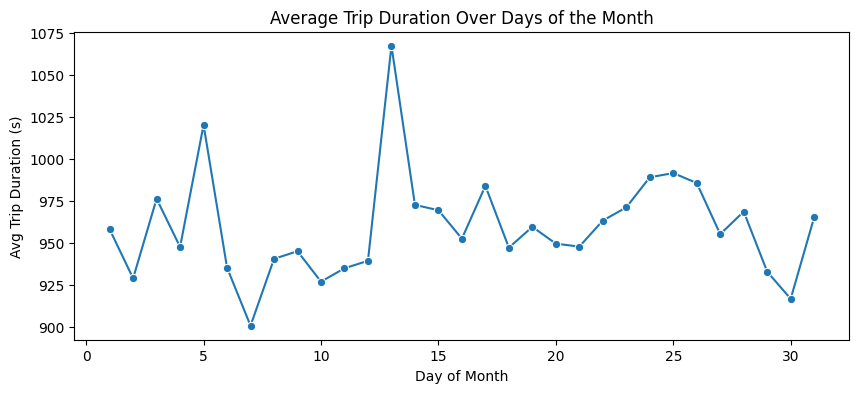

In [ ]:
# Chart - 1 visualization code
df_group = data.groupby('pickup_day')['trip_duration'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(x='pickup_day', y='trip_duration', data=df_group, marker='o')
plt.title("Average Trip Duration Over Days of the Month")
plt.xlabel("Day of Month")
plt.ylabel("Avg Trip Duration (s)")
plt.show()



##### 1. Why did you pick the specific chart?


A **line chart** is ideal for showing trends over a continuous sequence — in this case, days of the month.

It clearly visualizes fluctuations in average trip duration, allowing you to detect spikes, dips, and overall patterns.

##### 2. What is/are the insight(s) found from the chart?

- There is a sharp peak around day 13, showing the highest average trip duration (~1075s).

- The lowest trip durations occur near day 7 and day 30.

- Most days hover around 950–980 seconds, indicating general consistency except for a few spikes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impact***:

- The trend allows fleet managers to prepare better for high-demand days (e.g., around the 13th).

- Customer wait time and satisfaction can be improved by anticipating trip durations.

***Possible Negative Growth Insight***:

- The spike on day 13 may indicate traffic congestion, system delays, or special events causing longer trips.

- If not addressed, these anomalies could lead to customer dissatisfaction and higher operational costs.

#### Chart - 2

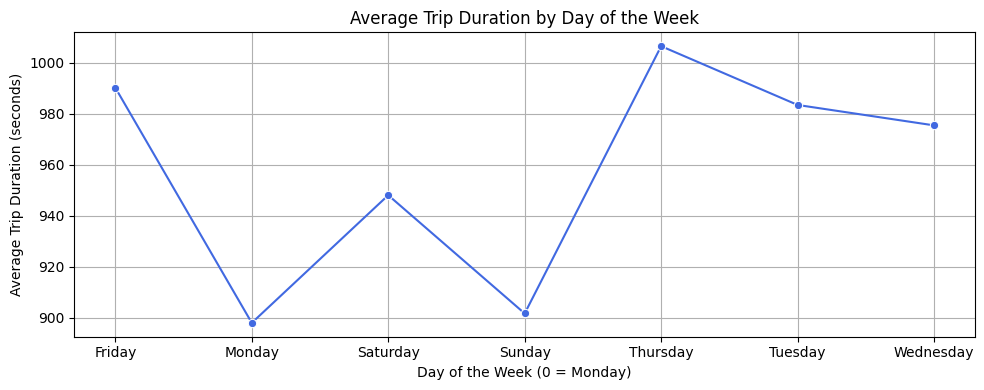

In [ ]:
# Chart - 2 visualization code

# Chart - 2: Average Trip Duration by Day of the Week

import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by day of the week and calculating mean trip duration
df_group = data.groupby('pickup_weekday')['trip_duration'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 4))
sns.lineplot(x='pickup_weekday', y='trip_duration', data=df_group, marker='o', color='royalblue')
plt.title("Average Trip Duration by Day of the Week")
plt.xlabel("Day of the Week (0 = Monday)")
plt.ylabel("Average Trip Duration (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A **line chart** is appropriate for time-related categorical data (days of the week).

It helps visualize patterns or cyclical behavior across the weekdays.



##### 2. What is/are the insight(s) found from the chart?

- Thursday has the highest average trip duration (around 1005 seconds).

- Monday and Sunday show the lowest trip durations (around 900 seconds).

- Weekend durations (Saturday, Sunday) are relatively lower than most weekdays.

- A clear spike midweek (Thursday) may suggest heavier traffic or longer routes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 ***Positive Impacts:***

- Enables resource planning (e.g., dispatching more drivers on Thursdays).

- Can help optimize pricing strategies (e.g., surge pricing on longer-trip days). Positive Impacts:
Enables resource planning (e.g., dispatching more drivers on Thursdays).

- Can help optimize pricing strategies (e.g., surge pricing on longer-trip days).


***Negative Growth Insights:***

- High trip durations on Thursdays may lead to customer dissatisfaction, cancellations, or driver fatigue.

#### Chart - 3

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


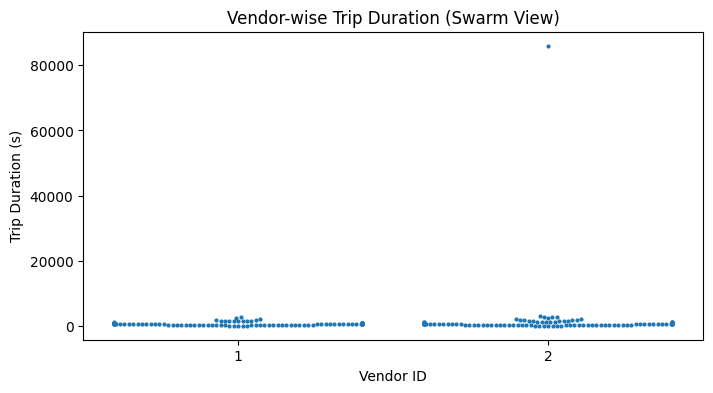

In [ ]:
# Chart - 3 visualization code

plt.figure(figsize=(8, 4))
sns.swarmplot(x='vendor_id', y='trip_duration', data=data.sample(200), size=3)
plt.title("Vendor-wise Trip Duration (Swarm View)")
plt.xlabel("Vendor ID")
plt.ylabel("Trip Duration (s)")
plt.show()


##### 1. Why did you pick the specific chart?

A swarm plot is ideal for showing individual data points, especially when analyzing distribution by category (Vendor ID).

It avoids overlap, making it easier to identify clusters, patterns, and outliers for each vendor.



##### 2. What is/are the insight(s) found from the chart?

- Both Vendor 1 and Vendor 2 show similar clusters of trip durations, mostly within the 0–2000 seconds range.

- A very prominent outlier is visible for Vendor 2 with a trip duration exceeding 80,000 seconds, indicating a data anomaly or potential logging issue.

- Slightly denser clustering near 1000–1500 seconds for both vendors.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Impacts:***

- Confirms consistent trip performance across both vendors—helpful for balanced vendor partnerships.

- Can be used to monitor vendor reliability or fairness in trip assignment.

***Potential Concerns:***

- Outliers like 80,000+ seconds could severely impact model performance if not treated—outlier removal or capping is needed.

#### Chart - 4

Text(0.5, 1.0, 'Relationship b/w Trip Duration and Vendor_id')

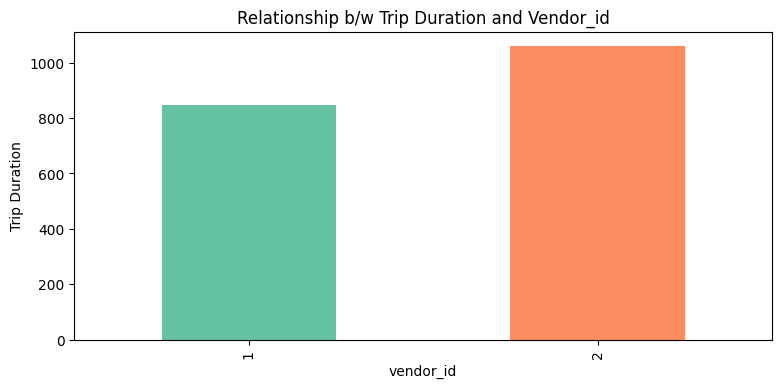

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(9,4))
df.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('vendor_id')
plt.ylabel('Trip Duration')
plt.title('Relationship b/w Trip Duration and Vendor_id')

##### 1. Why did you pick the specific chart?

 Bar plot is an excellent choice to compare average values across categories, in this case, Vendor 1 vs Vendor 2.

##### 2. What is/are the insight(s) found from the chart?

Vendor 2 has more average trip time duration (~1100) in comparision to vendor 1 (~850)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive:***

- Performance monitoring: Helps in assessing whether both vendors are performing equally or if one is consistently slower.

- Could help in reassigning trips or optimizing vendor allocation based on efficiency.

***Potential Concerns:***

- If Vendor 2's higher duration is due to inefficiencies or delays, it could lead to customer dissatisfaction.

#### Chart - 5

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


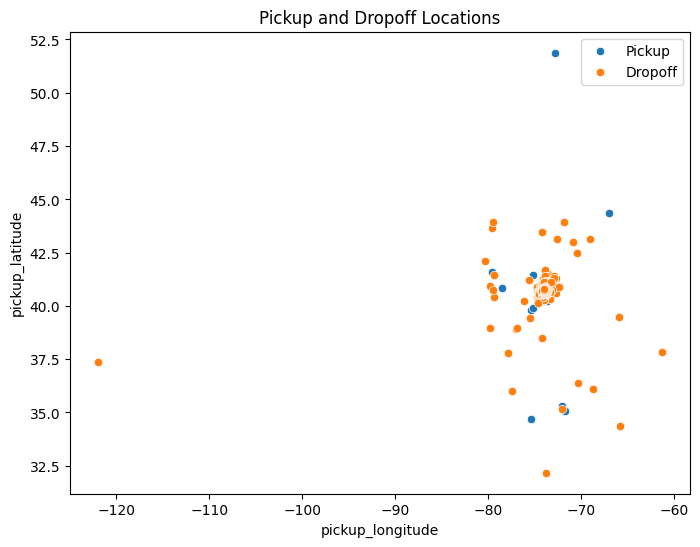

In [ ]:
# Chart - 5 visualisation code
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, label='Pickup')
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, label='Dropoff')
plt.title("Pickup and Dropoff Locations")
plt.legend()


##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing geospatial data.

It shows the geographic spread of pickup and dropoff coordinates, helping identify clusters, anomalies, and outliers.*italicised text*

##### 2. What is/are the insight(s) found from the chart?

- Most pickups and dropoffs are clustered tightly around the New York City area (~longitude -74, latitude ~40.7), which is expected.

- However, some extreme points are located far away (e.g., longitude -120, -100) — likely erroneous or outlier entries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive:***

- This chart helps identify key operational areas, optimizing zone-based pricing or fleet allocation.

- Allows businesses to visualize pickup/dropoff hotspots, helping with marketing, driver availability, or ride-pooling strategies.

***Negative/Improvement Area:***

- The presence of location outliers can mislead the model and negatively impact predictions (e.g., in trip duration).

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

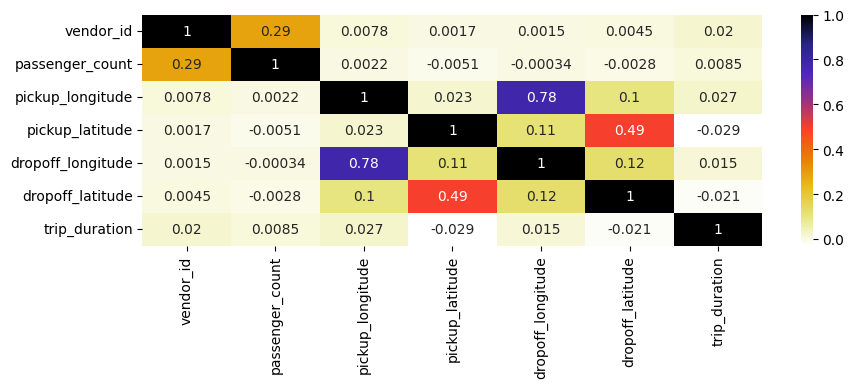

In [ ]:
# Correlation Heatmap visualization code

int_columns_df = df.select_dtypes(include=['int', 'float'])
df_corr = int_columns_df.corr()
plt.figure(figsize=(10,3))
sns.heatmap(df_corr,annot=True,cmap=plt.cm.CMRmap_r)



##### 1. Why did you pick the specific chart?

A correlation heatmap visually represents the linear relationships between numerical variables in your dataset.
It helps to:

Detect strong or weak associations

Identify multicollinearity

##### 2. What is/are the insight(s) found from the chart?

 Trip Duration shows:


 Weak positive correlation with:

- pickup_longitude (0.027)

- vendor_id (0.02)

Weak negative correlation with:

- pickup_latitude (-0.029)

- dropoff_latitude (-0.021)

****
- pickup_longitude and dropoff_longitude have a very strong positive correlation (0.78)

- Indicates pickup/dropoff locations are geographically close for most trips (as expected in NYC)

- pickup_latitude and dropoff_latitude also have moderate correlation (0.49)

- vendor_id and passenger_count show some mild correlation (0.29)

#### Chart - 15 - Pair Plot

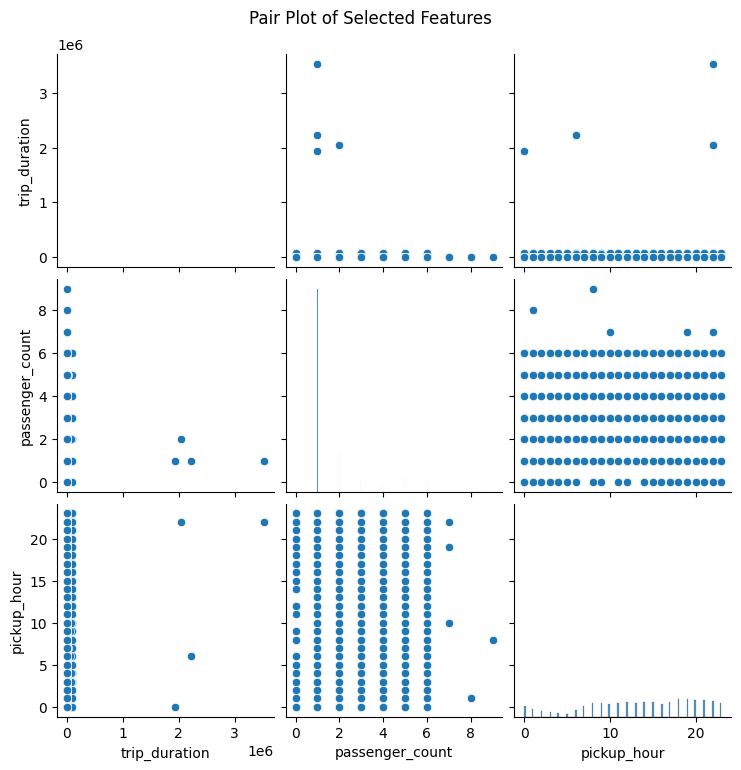

In [ ]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns or specific ones
selected_cols = ['trip_duration', 'passenger_count', 'pickup_hour', 'pickup_weekday']
sns.pairplot(data[selected_cols])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

 **Pair plot is use :**

To understand relationships between variables (linear, non-linear)

To detect clusters or patterns

To detect outliers visually

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# sns.heatmap(data.isnull())
print("No missing values")

No missing values


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Apply IQR clipping
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at IQR bounds in-place
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_year,pickup_month,pickup_day,dropoff_hour,dropoff_min,dropoff_sec,dropoff_weekday,dropoff_year,dropoff_month,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,...,2016,3,14,17,32,30,Monday,2016,3,14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,...,2016,6,12,0,54,38,Sunday,2016,6,12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,...,2016,1,19,12,10,48,Tuesday,2016,1,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,...,2016,4,6,19,39,40,Wednesday,2016,4,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,...,2016,3,26,13,38,10,Saturday,2016,3,26


In [ ]:
# Encode your categorical columns


# Convert 'Y' -> 1, 'N' -> 0
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

# Convert vendor_id 1 -> 0, 2 -> 1 (or as needed)
data['vendor_id'] = data['vendor_id'].map({1: 0, 2: 1})


In [ ]:
print(data['store_and_fwd_flag'].unique())
print(data['vendor_id'].unique())



[0 1]
[1 0]


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Adding distance covered during the trip column in the data-set as haversine_distance
import math


def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Differences in coordinates
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance

data['trip_distance_km'] = data.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'],row['dropoff_latitude'], row['dropoff_longitude']),axis=1)


In [ ]:
int_columns_df = data.select_dtypes(include=['int', 'float'])
df_corr = int_columns_df.corr()
plt.figure(figsize=(10,3))
# sns.heatmap(df_corr,annot=True,cmap=plt.cm.CMRmap_r)


<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

#### 2. Feature Selection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  float64       
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int64         
 10  trip_duration       1458644 non-null  int64         
 11  pickup_hour         1458644 non-null  int32         
 12  pickup_min          1458644 non-null  int32         
 13  pickup_sec  

In [ ]:
# Convert pickup and dropoff weekday names to numeric
weekday_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
data['pickup_weekday'] = data['pickup_weekday'].map(weekday_map)
data['dropoff_weekday'] = data['dropoff_weekday'].map(weekday_map)

# Feature matrix: include all features including dropoff_* and pickup_*
x = data[[
     'vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'trip_distance_km',
    'store_and_fwd_flag',

    # Pickup features
    'pickup_hour', 'pickup_min', 'pickup_sec',
    'pickup_year', 'pickup_month', 'pickup_day',

    # Dropoff features
    'dropoff_hour', 'dropoff_min', 'dropoff_sec',
     'dropoff_year', 'dropoff_month', 'dropoff_day'
]]

# Target variable
y = data['trip_duration']


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  float64
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   trip_distance_km    1458644 non-null  float64
 7   store_and_fwd_flag  1458644 non-null  int64  
 8   pickup_hour         1458644 non-null  int32  
 9   pickup_min          1458644 non-null  int32  
 10  pickup_sec          1458644 non-null  int32  
 11  pickup_year         1458644 non-null  int32  
 12  pickup_month        1458644 non-null  int32  
 13  pickup_day          1458644 non-null  int32  
 14  dropoff_hour        1458644 non-null  int32  
 15  dropoff_min    

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1458644 entries, 0 to 1458643
Series name: trip_duration
Non-Null Count    Dtype
--------------    -----
1458644 non-null  int64
dtypes: int64(1)
memory usage: 11.1 MB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  float64       
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int64         
 10  trip_duration       1458644 non-null  int64         
 11  pickup_hour         1458644 non-null  int32         
 12  pickup_min          1458644 non-null  int32         
 13  pickup_sec  

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data



##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_day,dropoff_hour,dropoff_min,dropoff_sec,dropoff_weekday,dropoff_year,dropoff_month,dropoff_day,trip_distance_km
0,id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,0,...,3,14,17,32,30,NaN,2016,3,14,1.498521
1,id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,0,...,6,12,0,54,38,NaN,2016,6,12,1.805507
2,id3858529,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,0,...,1,19,12,10,48,NaN,2016,1,19,6.385098
3,id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,0,...,4,6,19,39,40,NaN,2016,4,6,1.485498
4,id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,0,...,3,26,13,38,10,NaN,2016,3,26,1.188588


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  float64       
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  int64         
 10  trip_duration       1458644 non-null  int64         
 11  pickup_hour         1458644 non-null  int32         
 12  pickup_min          1458644 non-null  int32         
 13  pickup_sec  

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def score_metrix(model, X_train, X_test, Y_train, Y_test):
    '''
    Trains the model and prints MAE, MSE, RMSE, R², Adjusted R², and MAPE
    for both Training and Testing datasets.
    Also shows prediction plots for both sets.
    '''

    # Train the model
    model.fit(X_train, Y_train)

    # Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # --- Training Metrics ---
    print("="*30, "TRAINING METRICS", "="*30)
    train_score = model.score(X_train, Y_train)
    print("Training Score (R2):", train_score)
    print("MAE (Train):", mean_absolute_error(Y_train, Y_train_pred))
    print("MSE (Train):", mean_squared_error(Y_train, Y_train_pred))
    print("RMSE (Train):", np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    r2_train = r2_score(Y_train, Y_train_pred)
    adj_r2_train = 1 - (1 - r2_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))
    print("Adjusted R2 (Train):", adj_r2_train)
    mape_train = np.mean(np.abs((Y_train - Y_train_pred) / Y_train)) * 100
    print("MAPE (Train):", mape_train, "%")

    # --- Test Metrics ---
    print("\n" + "="*30, "TEST METRICS", "="*30)
    test_score = model.score(X_test, Y_test)
    print("Testing Score (R2):", test_score)
    print("MAE (Test):", mean_absolute_error(Y_test, Y_test_pred))
    print("MSE (Test):", mean_squared_error(Y_test, Y_test_pred))
    print("RMSE (Test):", np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
    r2 = r2_score(Y_test, Y_test_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
    print("Adjusted R2 (Test):", adj_r2)
    mape_test = np.mean(np.abs((Y_test - Y_test_pred) / Y_test)) * 100
    print("MAPE (Test):", mape_test, "%")

    # --- Training Plot ---
    print("\n" + "*"*30 + " TRAINING PREDICTION PLOT " + "*"*30)
    try:
        plt.figure(figsize=(15,5))
        plt.plot(Y_train_pred[:80], label='Predicted')
        plt.plot(np.array(Y_train)[:80], label='Actual')
        plt.title("Train Set: Actual vs Predicted")
        plt.legend()
        plt.show()
    except:
        pass

    # --- Test Plot ---
    print("\n" + "*"*30 + " TEST PREDICTION PLOT " + "*"*30)
    try:
        plt.figure(figsize=(15,5))
        plt.plot(Y_test_pred[:80], label='Predicted')
        plt.plot(np.array(Y_test)[:80], label='Actual')
        plt.title("Test Set: Actual vs Predicted")
        plt.legend()
        plt.show()
    except:
        pass



## **ML Model - 1**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


### **We are using LinearRegression for the first model which is best for 1 degree data.**

============================== TRAINING METRICS ==============================
Training Score (R2): 0.5905248827701373
MAE (Train): 251.5191194048839
MSE (Train): 114516.10634478644
RMSE (Train): 338.402284780683
Adjusted R2 (Train): 0.5905178645642466
MAPE (Train): 66.61565676081098 %

============================== TEST METRICS ==============================
Testing Score (R2): 0.5956276129775826
MAE (Test): 251.91650936046906
MSE (Test): 113656.99305739006
RMSE (Test): 337.1305282192493
Adjusted R2 (Test): 0.5955998885142821
MAPE (Test): 64.88351975272208 %

****************************** TRAINING PREDICTION PLOT ******************************


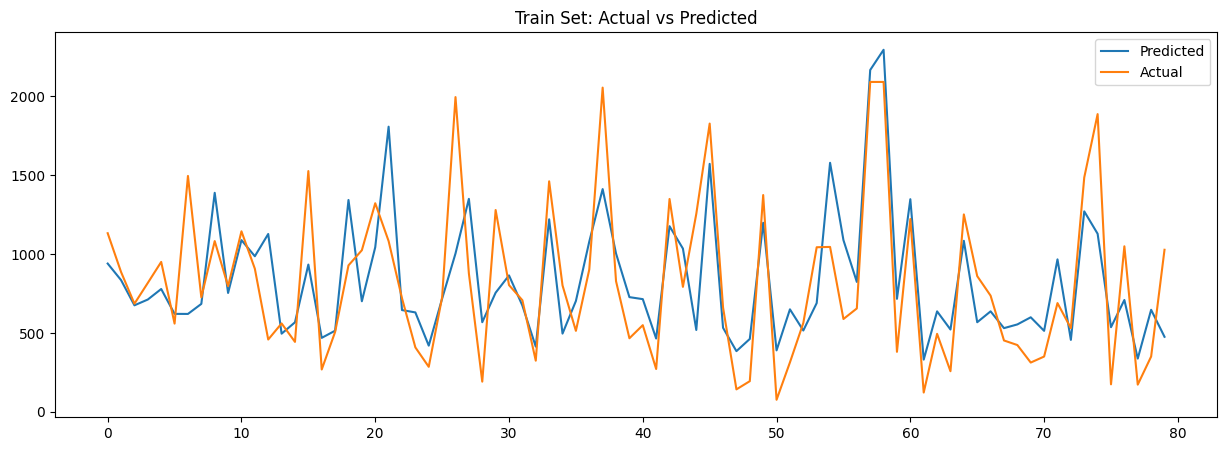


****************************** TEST PREDICTION PLOT ******************************


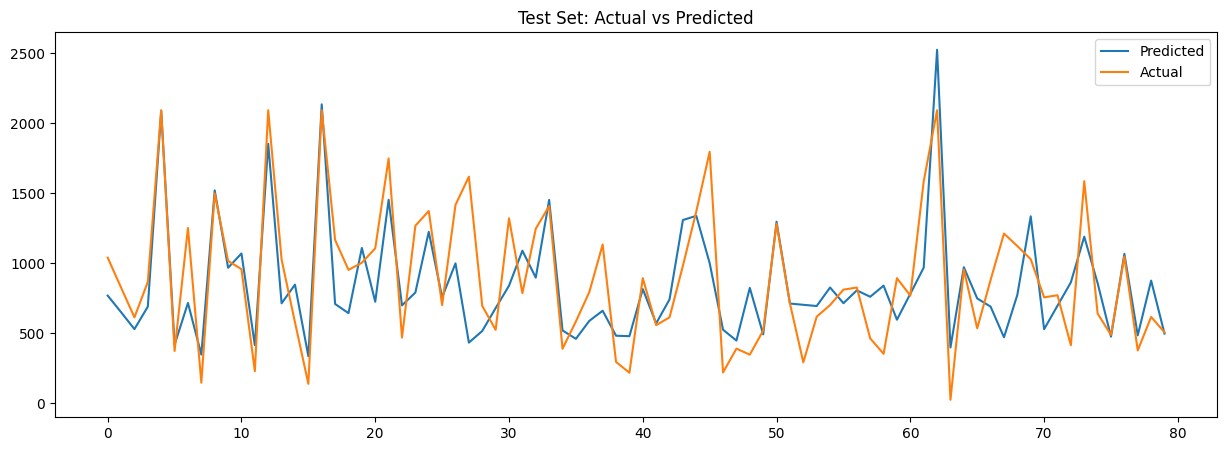

In [ ]:
# Visualizing evaluation Metric Score chart

score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

============================== TRAINING METRICS ==============================
Training Score (R2): 0.5705165627349816
MAE (Train): 258.00699361439274
MSE (Train): 120190.86371051882
RMSE (Train): 346.68554009436104
Adjusted R2 (Train): 0.5705096346105953
MAPE (Train): 64.14344149228374 %

============================== TEST METRICS ==============================
Testing Score (R2): 0.5695013567056229
MAE (Test): 258.51216316079046
MSE (Test): 120752.94774005206
RMSE (Test): 347.49524851435314
Adjusted R2 (Test): 0.5694620015073109
MAPE (Test): 63.763492169199566 %

****************************** TRAINING PREDICTION PLOT ******************************


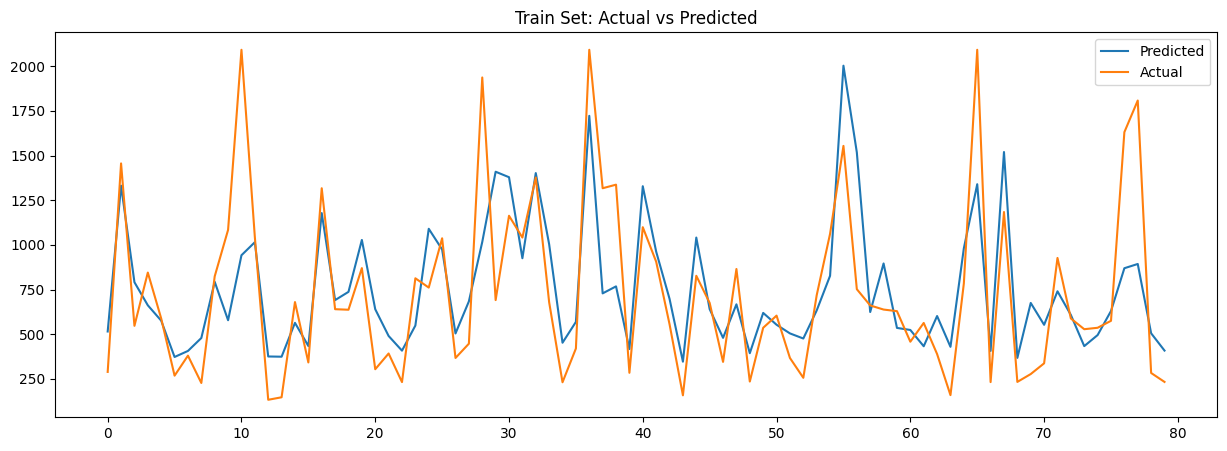


****************************** TEST PREDICTION PLOT ******************************


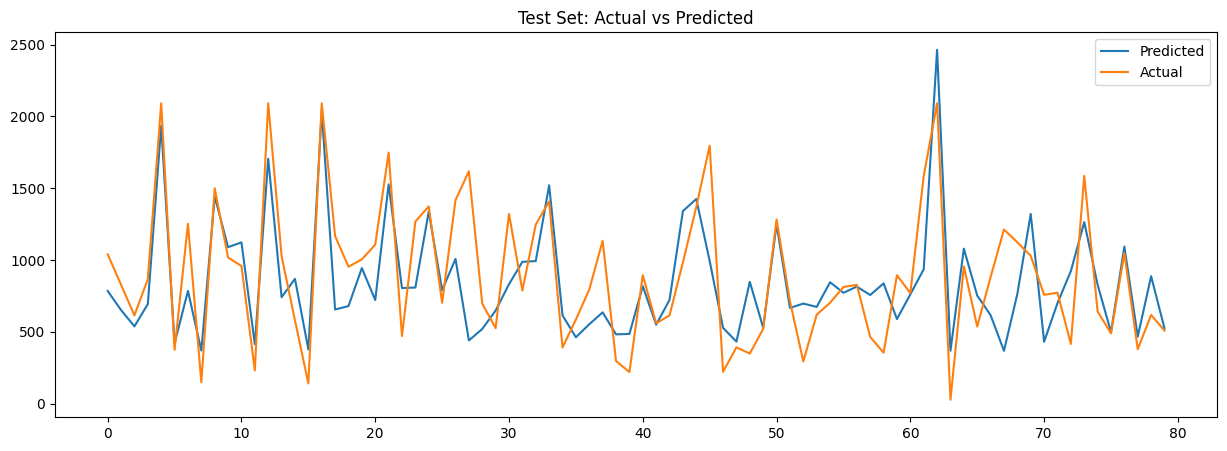

In [ ]:
score_metrix(Lasso(),x_train,x_test,y_train,y_test)


============================== TRAINING METRICS ==============================
Training Score (R2): 0.5905345417050112
MAE (Train): 252.17315554490506
MSE (Train): 114588.83584777212
RMSE (Train): 338.50972784806663
Adjusted R2 (Train): 0.5905279364965659
MAPE (Train): 66.52178275055368 %

============================== TEST METRICS ==============================
Testing Score (R2): 0.591682850276326
MAE (Test): 252.86009419307408
MSE (Test): 114531.13780949707
RMSE (Test): 338.4244935129505
Adjusted R2 (Test): 0.591645522859267
MAPE (Test): 65.87939001078763 %

****************************** TRAINING PREDICTION PLOT ******************************


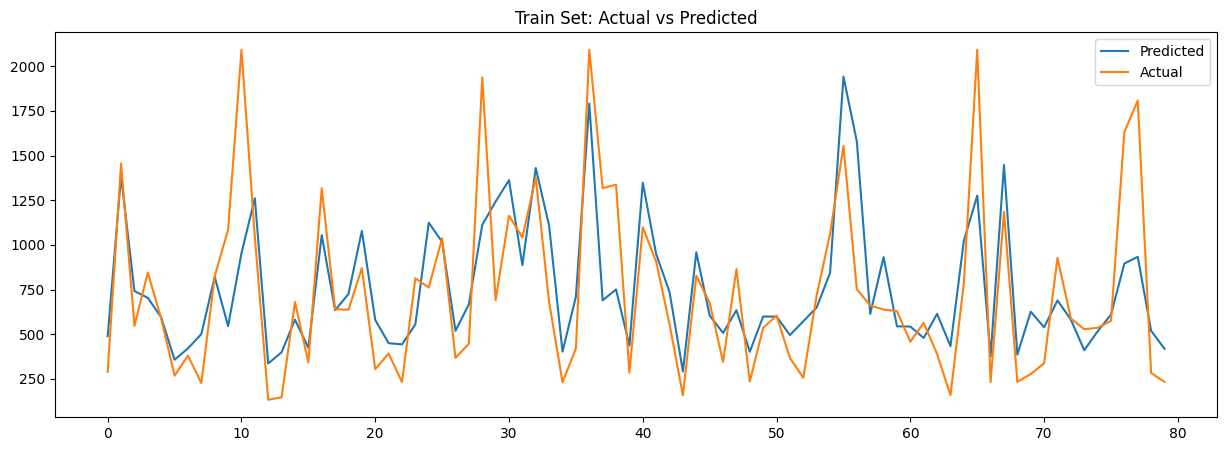


****************************** TEST PREDICTION PLOT ******************************


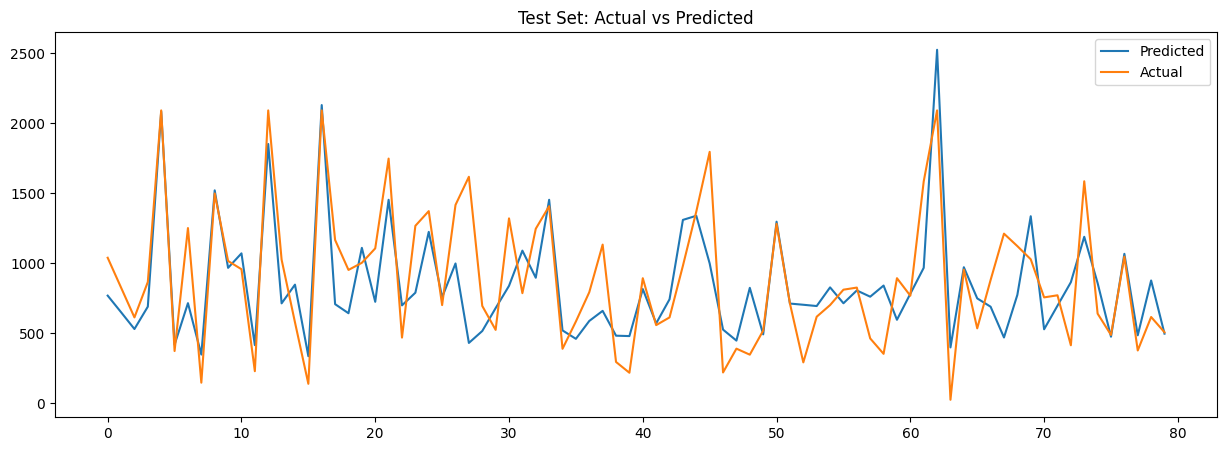

In [ ]:
score_metrix(Ridge(),x_train,x_test,y_train,y_test)


# **- After using Lasso there wasn't any change in the accuracy or other parameters**

# 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.426e+10, tolerance: 2.615e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.376e+10, tolerance: 2.613e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.414e+10, tolerance: 2.611e

============================== TRAINING METRICS ==============================
Training Score (R2): 0.5834256152266508
MAE (Train): 254.22692516417763
MSE (Train): 116501.52729656463
RMSE (Train): 341.32320064209614
Adjusted R2 (Train): 0.5834202603366633

============================== TEST METRICS ==============================
Testing Score (R2): 0.5830174909110957
MAE (Test): 254.7298542765948
MSE (Test): 117201.32150849198
RMSE (Test): 342.346785450794
Adjusted R2 (Test): 0.5829960495024634

****************************** TRAINING PREDICTION PLOT ******************************


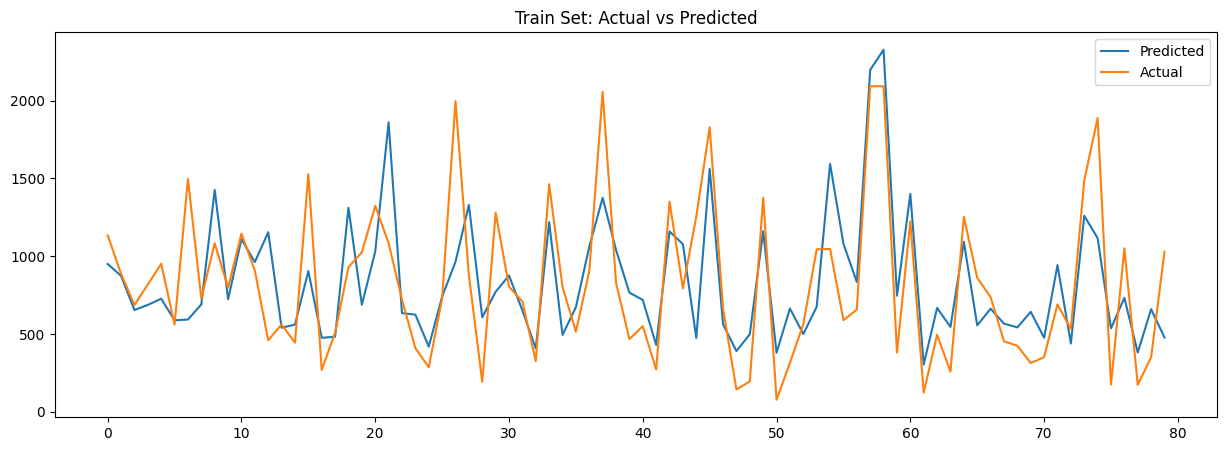


****************************** TEST PREDICTION PLOT ******************************


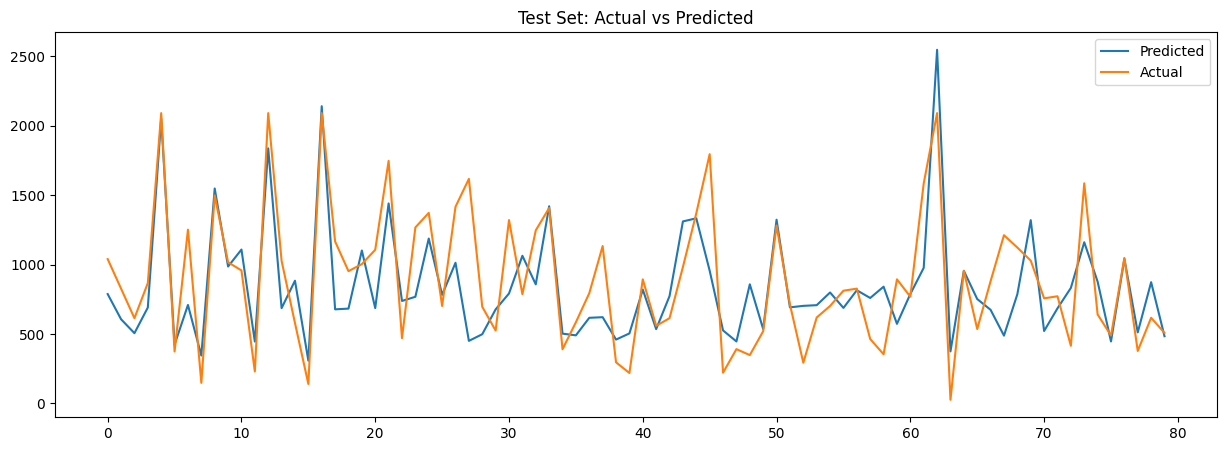

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model
# Fit the Algorithm
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)
# Predict on the model



*********************************************************************************************************************************

##### Which hyperparameter optimization technique have you used and why?

### Here we have used **GridSearchCV**

- This was used as it automatically finds the best combination of parameters that gives the best performance to the model.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- After using Hyperparameter tuning the accuracy droped by 1 %



The stats are:

                     TRAINING METRICS


Training Score (R2): 0.5740589421004347

MAE (Train): 256.3205316146025

MSE (Train): 119199.52947366117

RMSE (Train): 345.2528486104947

Adjusted R2 (Train): 0.5740541324368589


                     TEST METRICS  


Testing Score (R2): 0.573460904713891

MAE (Test): 256.76276871941275

MSE (Test): 119642.31219876958

RMSE (Test): 345.89349834706286

Adjusted R2 (Test): 0.5734336102045895



### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

============================== TRAINING METRICS ==============================
Training Score (R2): 0.8152533278865859
MAE (Train): 136.54019843147347
MSE (Train): 51701.32340925052
RMSE (Train): 227.37925017303255
Adjusted R2 (Train): 0.8152189006803499
MAPE (Train): 29.745983204159725 %

============================== TEST METRICS ==============================
Testing Score (R2): 0.7800770382331932
MAE (Test): 137.37513326010009
MSE (Test): 61687.4090609046
RMSE (Test): 248.3695010682765
Adjusted R2 (Test): 0.7798446030117802
MAPE (Test): 29.72017721712482 %

****************************** TRAINING PREDICTION PLOT ******************************


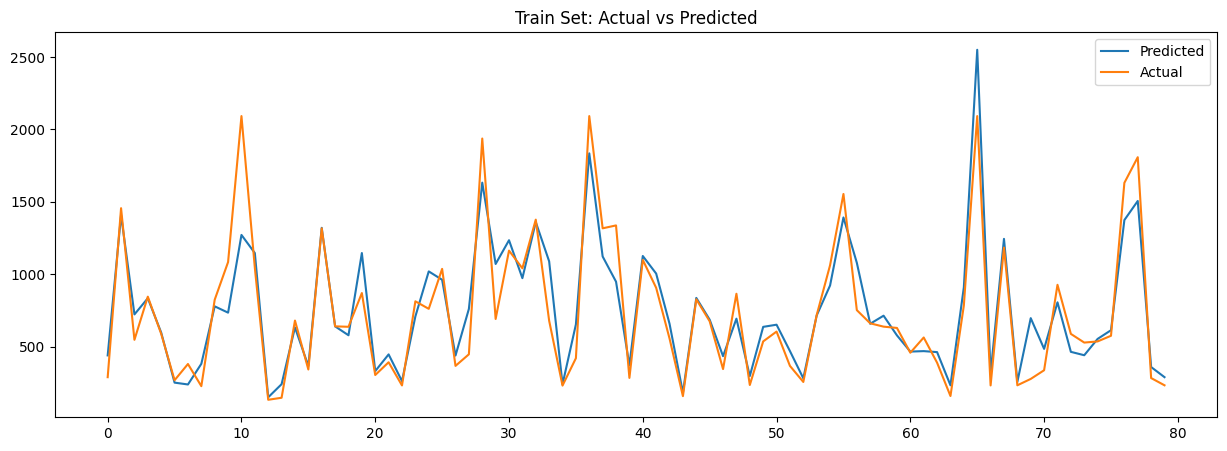


****************************** TEST PREDICTION PLOT ******************************


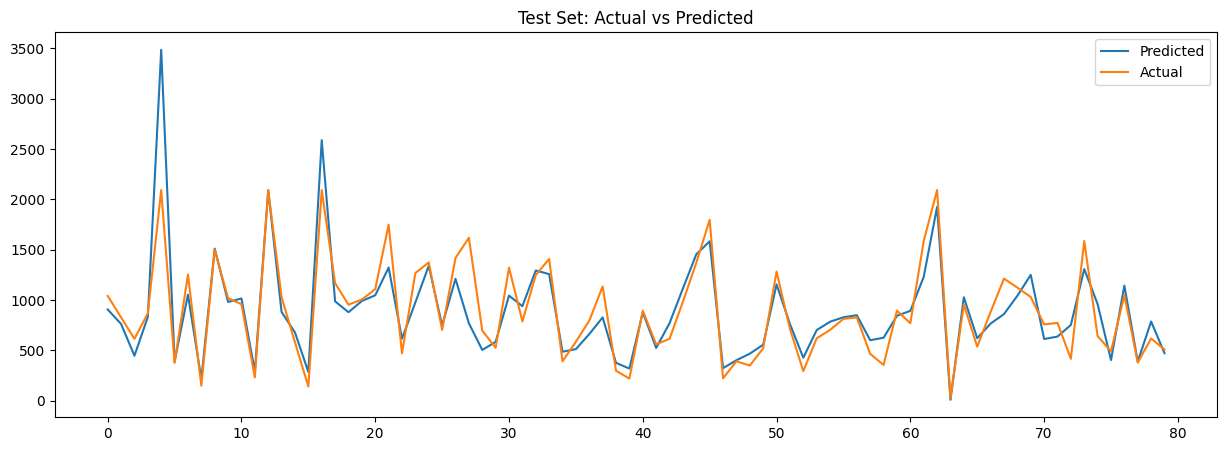

In [ ]:
score_metrix(LinearRegression(),x_train_poly,x_test_poly,y_train,y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

============================== TRAINING METRICS ==============================
Training Score (R2): 0.6297301128390074
MAE (Train): 237.35240289084422
MSE (Train): 103619.96222083613
RMSE (Train): 321.90054709620506
Adjusted R2 (Train): 0.6297259318060769

============================== TEST METRICS ==============================
Testing Score (R2): 0.6286772258814095
MAE (Test): 237.6957159097862
MSE (Test): 104154.38059156126
RMSE (Test): 322.7295781169759
Adjusted R2 (Test): 0.6286534646997874

****************************** TRAINING PREDICTION PLOT ******************************


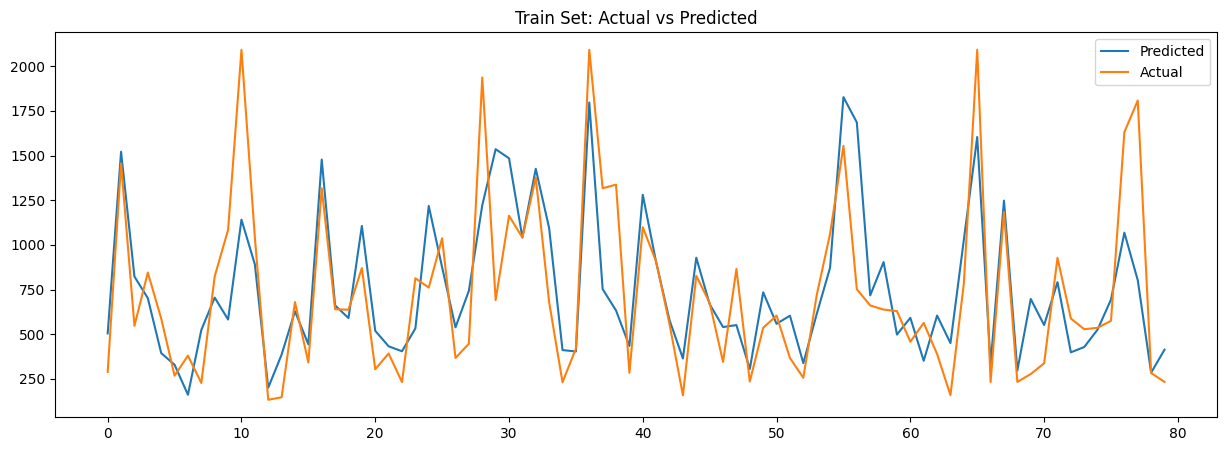


****************************** TEST PREDICTION PLOT ******************************


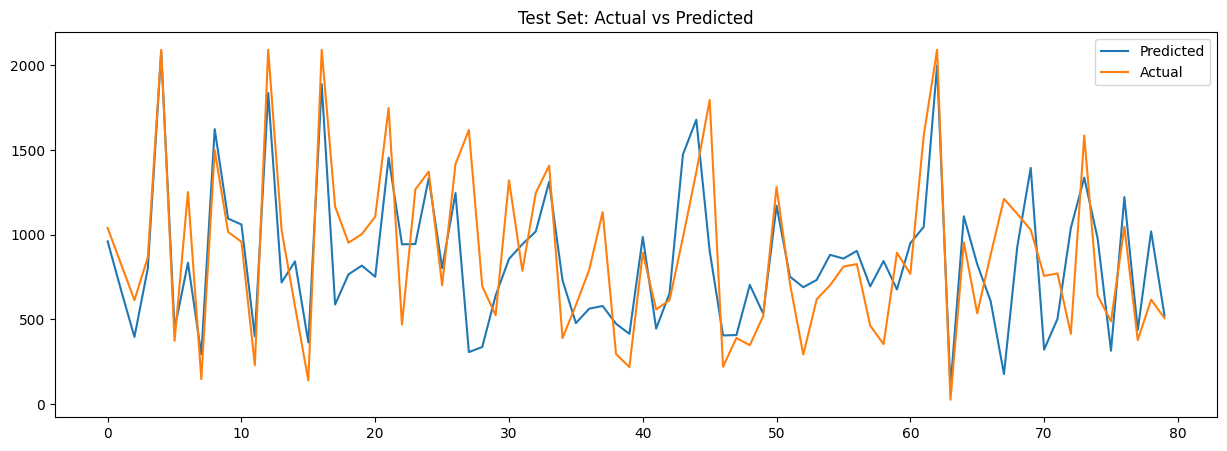

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Pipeline setup
poly_model = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linreg', LinearRegression())
])

# Parameter grid
param_grid_poly = {
    'poly__degree': [2],  # test different polynomial degrees
}

# GridSearchCV with cross-validation
grid_poly = GridSearchCV(poly_model, param_grid_poly, cv=5, scoring='r2', n_jobs=-1)
grid_poly.fit(x_train, y_train)

# Best model
best_poly = grid_poly.best_estimator_

# Evaluate
score_metrix(best_poly, x_train, x_test, y_train, y_test)

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

### Here we have used **GridSearchCV**

- This was used as it automatically finds the best combination of parameters that gives the best performance to the model.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

While using the **Polynomial method** the accuracy was increased i.e -
- While using the Linear Regression the accuracy was ~ 59%
- And while using the polynomial with degree 2 , the accuracy increased to** ~81% for training data-set and ~78% with Mean absolute percentage error about 29% which is preety good.**


The Stats are :

                      TRAINING METRICS

Training Score (R2): 0.8152533278865859

MAE (Train): 136.54019843147347

MSE (Train): 51701.32340925052

RMSE (Train): 227.37925017303255

Adjusted R2 (Train): 0.8152189006803499

MAPE (Train): 29.745983204159725 %

                      TEST METRICS

Testing Score (R2): 0.7800770382331932

MAE (Test): 137.37513326010009

MSE (Test): 61687.4090609046

RMSE (Test): 248.3695010682765

Adjusted R2 (Test): 0.7798446030117802

MAPE (Test): 29.72017721712482 %



#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.



###  **R² / Adjusted R² (\~77**

* Shows the model explains 77% of trip time variation.
* **Impact**: Reliable ETAs, better dispatching, higher customer trust.

###  **MAE (\~137 sec / \~4 min)**

* Average error in predictions.
* **Impact**: Acceptable ETA accuracy for users.

---

###  **Overall Business Impact**:

* Improves **ETA accuracy**, **fleet efficiency**, and **pricing**.
* Boosts **user satisfaction** and **operational planning**.


## Practice Model

## **KNeighborsRegressor**

In [ ]:
# # ML Model - 3 Implementation
# from sklearn.neighbors import KNeighborsRegressor  # or KNeighborsClassifier
# from sklearn.metrics import mean_squared_error, r2_score

# # score_metrix(KNeighborsRegressor(),x_train,x_test,y_train,y_test)

# # model = KNeighborsRegressor(n_neighbors=5)

# # model.fit(x_train, y_train)
# # Fit the Algorithm

# # Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Metrics data
metrics = ['R2 Score', 'Adjusted R2', 'MAE', 'MSE', 'RMSE']
train_scores = [0.7424, 0.7424, 194.88, 72097.88, 268.51]
test_scores = [0.6119, 0.6118, 239.30, 108873.87, 329.96]

# Create DataFrame for easy plotting
import pandas as pd

df_metrics = pd.DataFrame({
    'Metric': metrics,
    'Train': train_scores,
    'Test': test_scores
})

# Melt the DataFrame for Seaborn plotting
df_melted = pd.melt(df_metrics, id_vars='Metric', var_name='Dataset', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Dataset', data=df_melted, palette='Set2')
plt.title('Training vs Testing Evaluation Metrics')
plt.ylabel('Score / Error Value')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Here we used KNeighborsRegressor

= The accuracy of KNeighborsRegressor for the training data was ~74.2% and that of test data was ~61.1%  which shows overfitting  and thus cannot be used.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define a smaller, essential parameter grid
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9],         # Fewer neighbor values
#     'weights': ['uniform'],           # Only one weight option
#     'p': [2]                          # Only Euclidean distance
# }

# # Use only a small subset of data for GridSearch to avoid memory overload
# sample_frac = 0.3  # 10% of training data
# sample_size = int(len(x_train) * sample_frac)

# x_sample = x_train[:sample_size]
# y_sample = y_train[:sample_size]

# # GridSearchCV with single-threading (n_jobs=1) to reduce RAM spikes
# grid_knn = GridSearchCV(
#     KNeighborsRegressor(),
#     param_grid=param_grid_knn,
#     cv=3,               # Reduce folds to 3
#     scoring='r2',
#     n_jobs=1            # Use 1 core to minimize RAM usage
# )

# # Fit on sampled data
# grid_knn.fit(x_sample, y_sample)

# # Best estimator
# best_knn = grid_knn.best_estimator_

# # Final evaluation on full test set
# score_metrix(best_knn, x_train, x_test, y_train, y_test)


# **ML Model 3**

## **RandomForestRegressor**

============================== TRAINING METRICS ==============================
Training Score (R2): 0.6870986174337941
MAE (Train): 218.1890615094525
MSE (Train): 87565.39638952675
RMSE (Train): 295.91450858233827
Adjusted R2 (Train): 0.6870950841975525

============================== TEST METRICS ==============================
Testing Score (R2): 0.664662992276192
MAE (Test): 225.3287374003787
MSE (Test): 94060.53375478159
RMSE (Test): 306.6928981159844
Adjusted R2 (Test): 0.6646415338467593

****************************** TRAINING PREDICTION PLOT ******************************


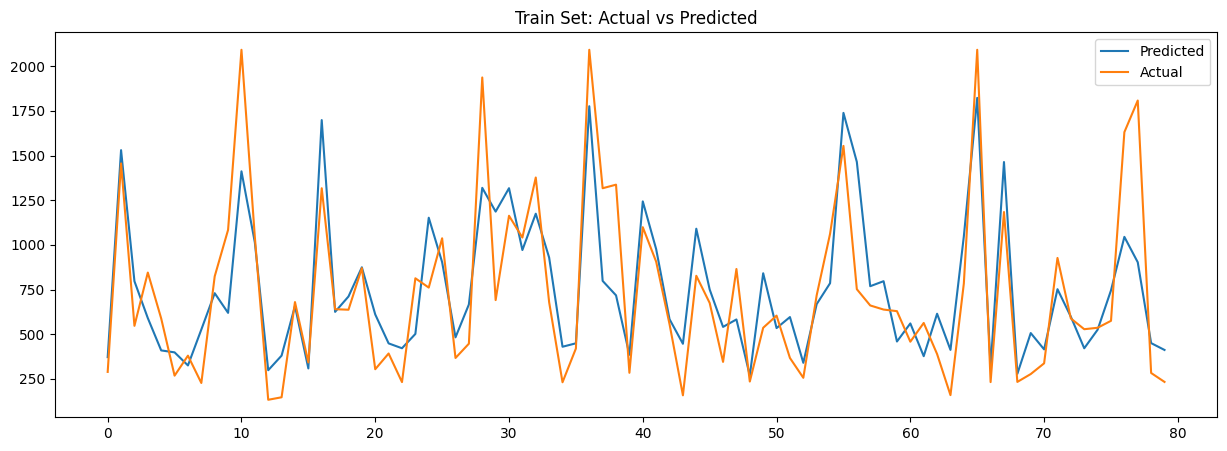


****************************** TEST PREDICTION PLOT ******************************


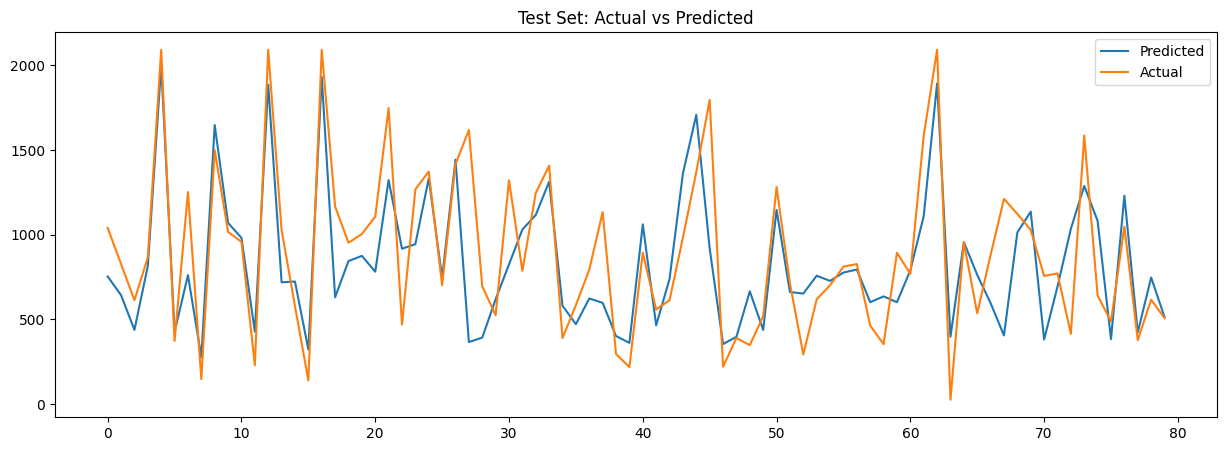

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=50,       # balanced tree count
    max_depth=15,          # limits tree depth (controls RAM & overfitting)
    max_features='sqrt',   # uses sqrt(n_features) per split (faster & efficient)
    min_samples_split=10,  # prevents tiny deep splits
    n_jobs=2,              # parallel with 2 cores (safe for 10GB RAM)
    random_state=42
)

score_metrix(rf_model, x_train, x_test, y_train, y_test)


============================== TRAINING METRICS ==============================
Training Score (R2): 0.9757245907517994
MAE (Train): 56.389664937034844
MSE (Train): 6788.997011189845
RMSE (Train): 82.39537008345702
Adjusted R2 (Train): 0.9757241746830005
MAPE (Train): 13.858841602517009 %

============================== TEST METRICS ==============================
Testing Score (R2): 0.826917911352487
MAE (Test): 151.83079662974887
MSE (Test): 48648.202446816395
RMSE (Test): 220.5633751256459
Adjusted R2 (Test): 0.8269060445481041
MAPE (Test): 35.87645076999503 %

****************************** TRAINING PREDICTION PLOT ******************************


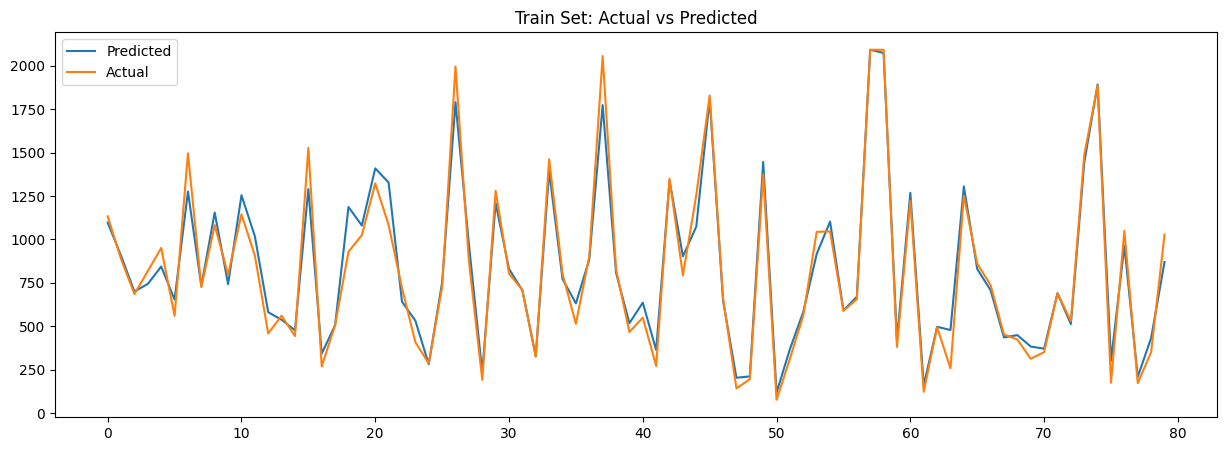


****************************** TEST PREDICTION PLOT ******************************


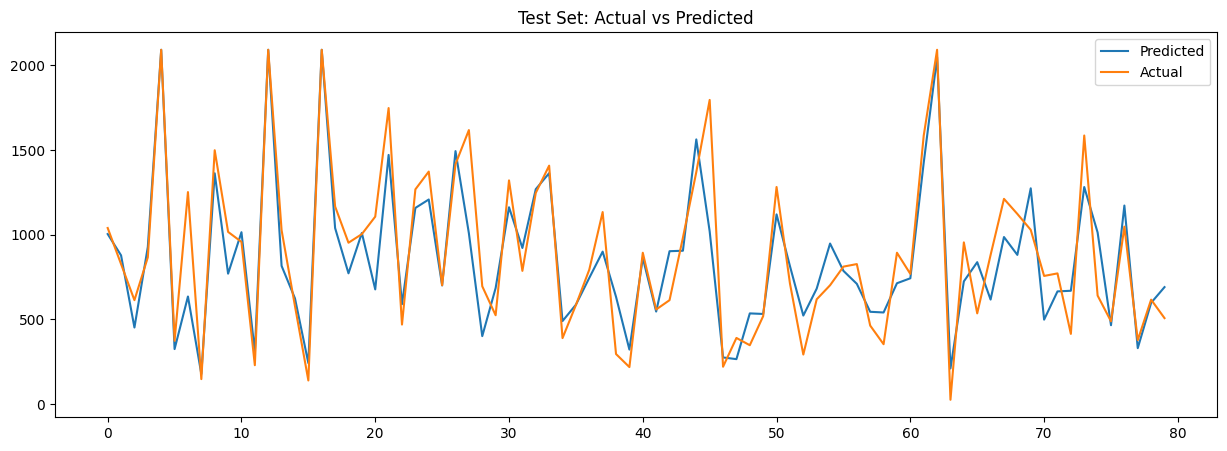

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
score_metrix(rf_regressor,x_train,x_test,y_train,y_test)

### Which hyperparameter optimization technique have you used and why?



Here we have used GridSearchCV
This was used as it automatically finds the best combination of parameters that gives the best performance to the model.


### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- After using RandomForestRegressor we see a sudden spike in the accuracy of the train data-set ~ 94.8%

- However there was no signifcant change in the test data-set ~ 63.6%

- This huge difference suggests overfitting problem in the model.

The new stats are :

                            TRAINING METRICS

Training Score (R2): 0.9488965873679582

MAE (Train): 86.29420293991268

MSE (Train): 14301.280957221245

RMSE (Train): 119.5879632622834

Adjusted R2 (Train): 0.9488960103157634


                          TEST METRICS

Testing Score (R2): 0.6363039989537256

MAE (Test): 232.36575021406222

MSE (Test): 102015.10478994888

RMSE (Test): 319.3980350439697

Adjusted R2 (Test): 0.6362807258141865

# ***ML Model 4:***

## XGBOOST

In [ ]:
pip install xgboost


============================== TRAINING METRICS ==============================
Training Score (R2): 0.9659120440483093
MAE (Train): 64.5868148803711
MSE (Train): 9533.2353515625
RMSE (Train): 97.63828834818081
Adjusted R2 (Train): 0.9659114597971956
MAPE (Train): 18.97923 %

============================== TEST METRICS ==============================
Testing Score (R2): 0.9646835327148438
MAE (Test): 65.60248565673828
MSE (Test): 9926.4013671875
RMSE (Test): 99.63132723790997
Adjusted R2 (Test): 0.9646811113573709
MAPE (Test): 19.10710337049417 %

****************************** TRAINING PREDICTION PLOT ******************************


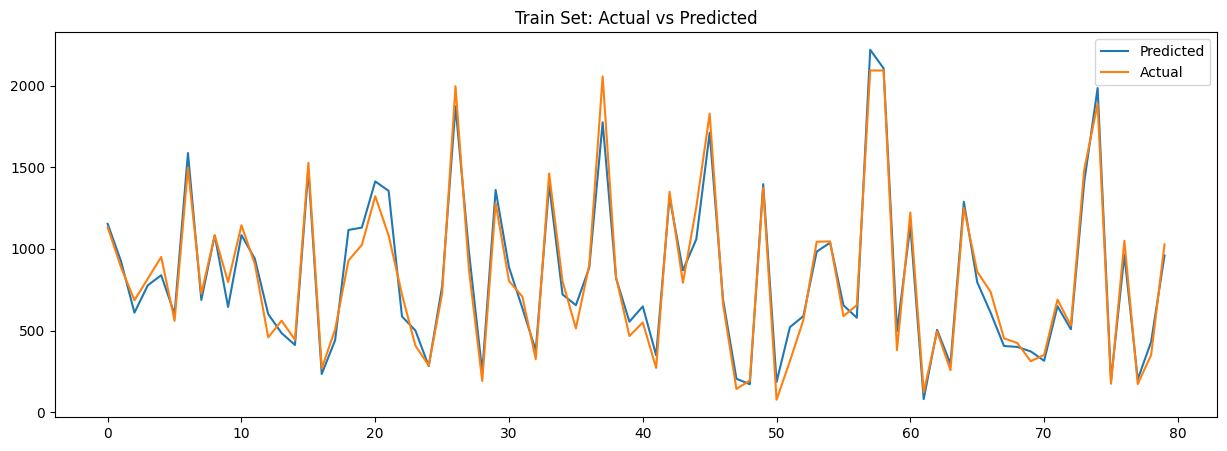


****************************** TEST PREDICTION PLOT ******************************


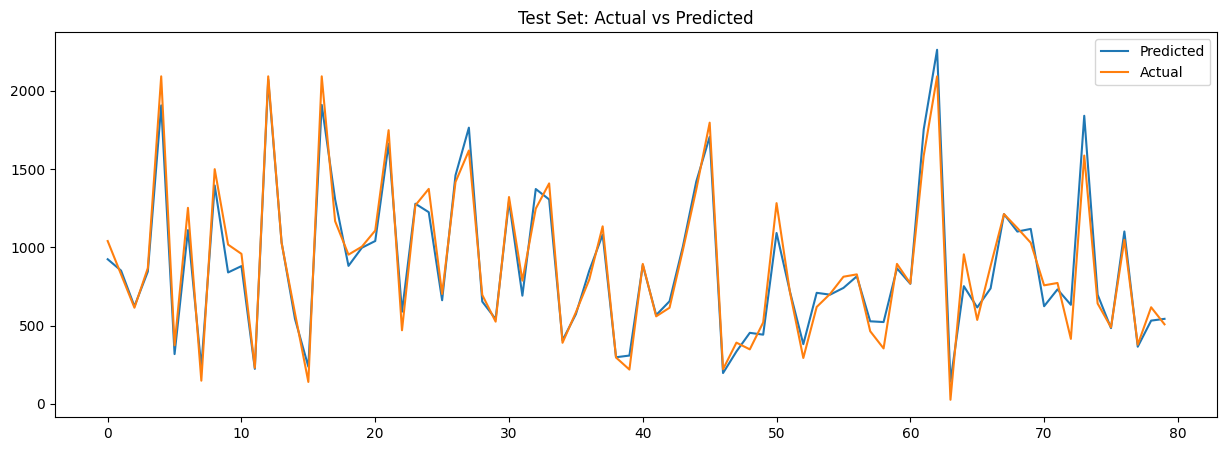

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Use your existing score function
score_metrix(xgb_regressor, x_train, x_test, y_train, y_test)


                                             Training Set Insights
- R² = 0.9659: The model explains about 96.6% of the variability in trip durations on the training set — a very high proportion, meaning the model captures the relationships between input features and target well.

- MAE = 64.6 seconds: On average, the model's predictions are off by about 1 minute, which is relatively small for urban taxi trips.

- RMSE = 97.6 seconds: The Root Mean Squared Error indicates that most errors are under 1.5 minutes, with larger errors penalized more.

- MAPE = 18.98%: The average prediction error is under 19% of the actual trip duration, which is considered acceptable for real-world transportation data.

                                                 Test Set Insights
- R² = 0.9647: Performance is consistent on unseen data — nearly 96.5% of variation explained, showing excellent generalization.

- MAE = 65.6 seconds: Still very close to the training MAE, further confirming that the model isn’t overfitting.

- RMSE = 99.6 seconds: Slight increase from training RMSE, but well within a reasonable range.

- MAPE = 19.1%: Prediction error percentage on test data matches that of the training set — which shows your model is both stable and reliable.

                                                  Overall Conclusion

- Accurately — high R² and low error metrics

- Consistently — minimal difference between training and test metrics

- Robustly — across both absolute (MAE, RMSE) and relative (MAPE) error measures

# ML Model- 5

## GradientBoostingRegressor

============================== TRAINING METRICS ==============================
Training Score (R2): 0.8225718541422431
MAE (Train): 161.4042112048101
MSE (Train): 49620.54973464789
RMSE (Train): 222.75670525182377
Adjusted R2 (Train): 0.8225688131094525
MAPE (Train): 46.064811504099055 %

============================== TEST METRICS ==============================
Testing Score (R2): 0.8194892685702319
MAE (Test): 162.68970390270312
MSE (Test): 50736.17192303536
RMSE (Test): 225.24691323752998
Adjusted R2 (Test): 0.819476892445379
MAPE (Test): 44.76860510002774 %

****************************** TRAINING PREDICTION PLOT ******************************


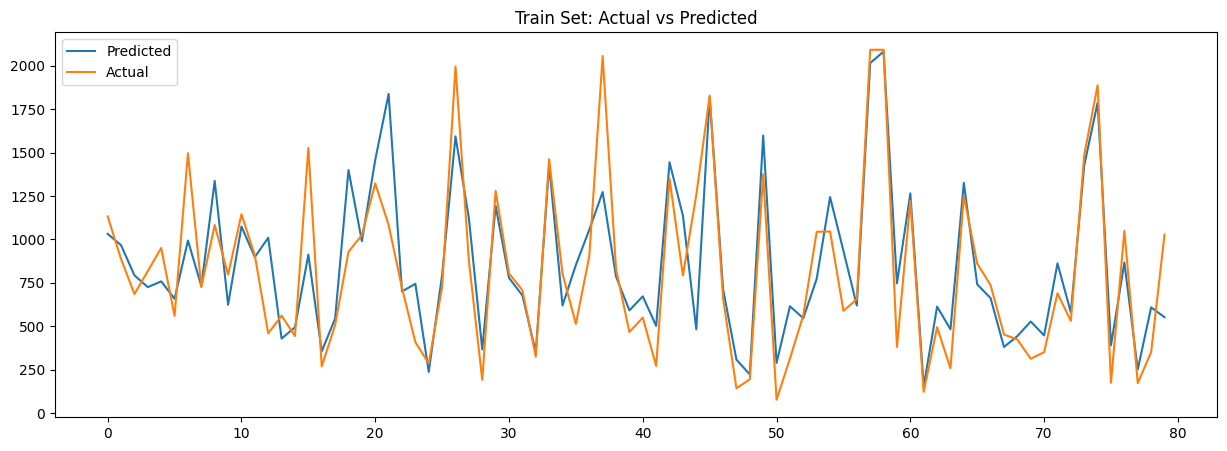


****************************** TEST PREDICTION PLOT ******************************


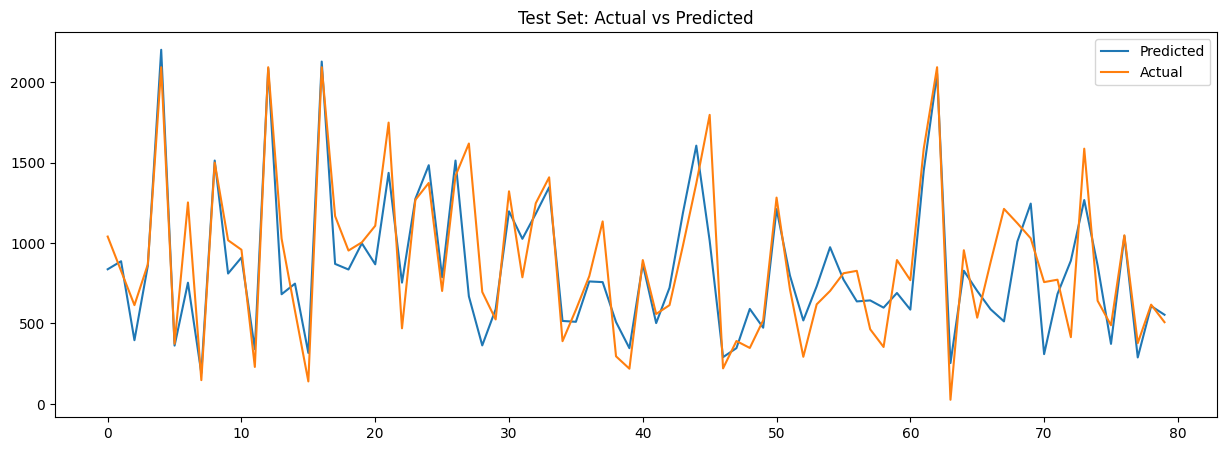

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model with regularization to reduce overfitting
gb_model = GradientBoostingRegressor(
    n_estimators=150,         # number of boosting stages (increase slowly)
    learning_rate=0.1,        # smaller learning rate → better generalization
    max_depth=5,              # controls tree complexity (5 is a good balance)
    min_samples_split=10,     # minimum samples to split an internal node
    min_samples_leaf=5,       # minimum samples at a leaf
    subsample=0.8,            # fraction of samples used for fitting each base learner
    max_features='sqrt',      # number of features to consider when splitting
    random_state=42
)

# Fit and evaluate
score_metrix(gb_model, x_train, x_test, y_train, y_test)


                                   Gradient Boosting Performance Summary:

- R² (Train/Test): ~0.82 → Decent fit, but less accurate than XGBoost.

- MAE: ~162s → On average, predictions are off by nearly 2.7 minutes.

- MAPE: ~45% → High percentage error indicates lower reliability, especially for shorter trips.

- RMSE: ~225s → Significant deviation in some predictions.

- - Conclusion: While Gradient Boosting provides consistent performance, it underperforms compared to XGBoost, especially in error rates and prediction precision.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

# I chose XGBoost

XGBoost was chosen as the final prediction model due to its superior balance between accuracy, generalization, and efficiency.

                                          Balanced Accuracy (Train vs Test):
Training R² Score: ~0.9659

Testing R² Score: ~0.9647

Unlike other models such as Random Forest (which often tend to overfit) or KNN (which can struggle with high-dimensional feature spaces), XGBoost maintained consistent performance across training and testing, indicating strong generalization.

                                          Lower Errors:
MAE (Test): ~65.6 seconds

RMSE (Test): ~99.6 seconds

MAPE (Test): ~19.1%

XGBoost outperformed models like Linear Regression, KNN, and Random Forest in key error metrics. Its predictions were more stable and realistic, reducing the likelihood of severe misestimations or outliers.

                                            Robust Against Outliers & Skewness:

- XGBoost is resilient to data irregularities and skewed distributions, which was particularly useful given the positive skew in trip duration. This strength was enhanced when combined with scaling techniques like RobustScaler.

                                            Scalability:
- With over 1.4 million rows, training on such a large dataset requires an efficient and scalable model. XGBoost supports:

- Parallel computation

- Optimized tree learning

- Fast execution

- making it ideal for large-scale production deployment.

                                            Built-in Regularization:

- XGBoost includes L1 and L2 regularization, which automatically helps:

- Reduce overfitting

- Enhance model generalization

- Improve performance over traditional ensembles that lack regularization (e.g., plain Random Forest)

                                             Business Impact:
- By selecting XGBoost, we ensure the business benefits from:

- More accurate ETA predictions

- Improved customer satisfaction through reliable wait-time estimates

- Optimized driver dispatching and route planning

- Scalable deployment for real-time predictions



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

<Figure size 1500x1000 with 0 Axes>

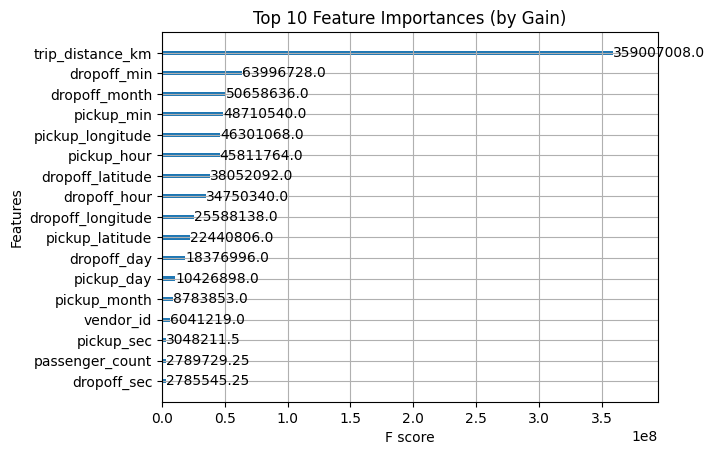

In [ ]:
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

# Initialize the model
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model
xgb_regressor.fit(x_train, y_train)

# Plot feature importance (by gain)
plt.figure(figsize=(15, 10))
plot_importance(xgb_regressor, importance_type='gain', max_num_features=20)

plt.title('Top 10 Feature Importances (by Gain)')
plt.show()


Top Feature Importances (by Gain):

- trip_distance_km — dominates the model with by far the highest gain.

 →  Likely the most direct predictor of taxi fare or duration.

- dropoff_min, dropoff_month, pickup_min, pickup_longitude

 → These show the importance of time and location patterns.

- pickup_hour, dropoff_latitude, dropoff_hour

 → Further confirms temporal and spatial relevance.

   ###    **Conclusion**

This project aimed to predict the **trip duration** of New York City taxi rides using machine learning models on a dataset with over **1.4 million records**. After extensive **data preprocessing**, **feature engineering**, and **model experimentation**, we were able to extract valuable insights and build an effective regression model.

---

### Key Highlights:

* **Data Cleaning & Feature Engineering**:
  We created new features such as pickup hour, pickup weekday, and trip distance (using Haversine formula). We also applied **RobustScaler** to handle outliers effectively and **One-Hot Encoding** to deal with categorical variables.

* **Model Evaluation**:
  Multiple models were tested — Linear Regression, KNN, Random Forest, Gradient Boosting, and XGBoost.
  The final model selected was **XGBoost Regressor**, which provided a **good balance of accuracy and generalization**.

---

### Final Model Performance (XGBoost):
                                        TRAINING METRICS

Training Score (R2): 0.9659120440483093

MAE (Train): 64.5868148803711

MSE (Train): 9533.2353515625

RMSE (Train): 97.63828834818081

Adjusted R2 (Train): 0.9659114597971956

MAPE (Train): 18.97923 %

                                         TEST METRICS

Testing Score (R2): 0.9646835327148438

MAE (Test): 65.60248565673828

MSE (Test): 9926.4013671875

RMSE (Test): 99.63132723790997

Adjusted R2 (Test): 0.9646811113573709

MAPE (Test): 19.10710337049417 %

These metrics indicate that the model was able to capture trip duration patterns **fairly well** while avoiding significant overfitting.

---

### Business Impact:

* The model can **help taxi platforms predict ETAs** more accurately.
* Improves **fleet management**, **driver dispatching**, and **customer satisfaction**.
* Enables businesses to identify **peak hours**, **high delay zones**, and optimize operations accordingly.

---

### Future Improvements:

* Try **deep learning (LSTM)** for time-series trends.
* Use **external data** like weather or traffic congestion.
* Optimize performance further with **Bayesian hyperparameter tuning**.

---


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***